In [53]:
import torch    
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets # transform모듈로 이미지를 불러오며 동시에 전처리 수행가능.

## GPU Settings

In [54]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda');

else:
    DEVICE = torch.device('cpu')

print('Using pytorch version:', torch.__version__, 'Device:', DEVICE)

Using pytorch version: 2.0.0+cu117 Device: cuda


## MNIST 다운로드

In [55]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,)) # mean=0.5, std=1.0, 채널별로 값을 할당해준다.
    ])


download_root = './Datasets/MINIST_dataset'

train_dataset = datasets.MNIST(download_root, transform = mnist_transform, train=True, download=True)
valid_dataset = datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [56]:
print("train_dataset: ", train_dataset, "\n")
print("test_dataset: ", test_dataset, "\n")
print("train_dataset.data.size(): ", train_dataset.data.size())
print("train_dataset.targets.size(): ", train_dataset.targets.size())


train_dataset:  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Datasets/MINIST_dataset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           ) 

test_dataset:  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Datasets/MINIST_dataset
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           ) 

train_dataset.data.size():  torch.Size([60000, 28, 28])
train_dataset.targets.size():  torch.Size([60000])


--train_dataset의 타입확인--
<class 'torchvision.datasets.mnist.MNIST'>
<class 'torch.Tensor'>
<class 'torch.Tensor'> 

--train_dataset의 shpae확인--
torch.Size([60000, 28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


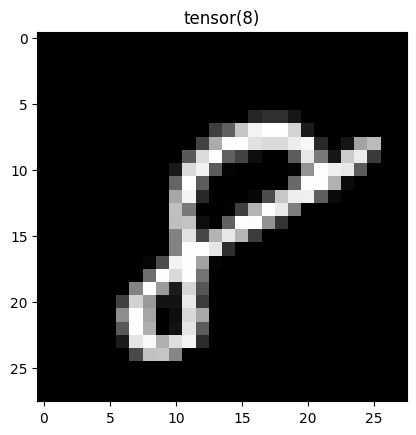

In [57]:
# train_dataset의 타입확인
print("--train_dataset의 타입확인--")
print(type(train_dataset))
print(type(train_dataset.data))
print(type(train_dataset.data[0]), '\n')

# train_dataset의 shpae확인
print("--train_dataset의 shpae확인--")
print(train_dataset.data.shape)
print(train_dataset.data[0].shape)
print(train_dataset.data[59999].shape) # 데이터가 총 60,000개 있으니 59,999 인덱스가 마지막 데이터이다.

plt.imshow(train_dataset.data[59999], cmap='gray')
plt.title(train_dataset.targets[59999])
plt.show()

## 데이터셋을 mini_batch 단위로 분리.

셔플시켜, neural net이 매번 같은 순서로 학습하지 않게 만든다.

In [58]:
batch_szie = 64
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

valid_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

## 데이터확인

In [59]:
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size( ), 'type:', x_train.type( ))
    print('y_train:', y_train.size( ), 'type:', y_train.type( ), '\n')

# x_train size: 이미지데이터 개수(batch_size)(64), 채널(그레이스케일), 가로, 세로, 
# y_train size: 64
# DataLoader 객체에서 batch_size를 64로 지정해주었으니, 이터레이션 한 번당 64개의 이미지를 텐서로 변환하여 들고온다.



x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongT

In [60]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

print(type(x_train[0, :, :, :]))
print(x_train[0, :, :, :].shape)

# for i in range(10):
#     plt.subplot(1, 10, i+1)
#     plt.axis('off')
#     plt.imshow(x_train[i, :, :, :], )

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


<Figure size 1000x100 with 0 Axes>

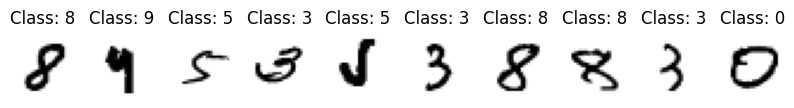

In [61]:
#시각화

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(x_train[i, :, :, :].numpy( ).reshape(28,28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))
    